# U.S. Medical Insurance Costs
Codecademy Portfolio Project by Leah Fulmer ([Github](https://github.com/lfulmer))<br>
With acknowledgements and gratitude to Syfa Collins ([GitHub](https://github.com/SyfaCollins/))

#### Preamble

I despise the United States medical insurance system and do not support the rote assumption of insurance costs functioning as they do now. Furthermore, body mass index (BMI) has consistently been identified as a misleading measurement of a person's body fat content ([Romero-Corral 2008](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2877506/)), as well as an inaccurate measurement of health ([Humphreys 2010](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2930234/), [Visaria 2023](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0287218)). While I resist the premise of the following dataset, I recognize that this dataset is part of the Codecademy Business Intelligence Data Analyst Career Path, and I am intent on approaching these projects sincerely. Thank you for understanding.

#### Project Objectives from Codecademy:

* Work locally on your own computer
* Import a dataset into your program
* Analyze a dataset by building out functions or class methods
* Use libraries to assist in your analysis
* Optional: Document and organize your findings
* Optional: Make predictions about a dataset’s features based on your findings


#### Table of Contents
[Section 1: Importing and Formatting the Data](#data)<br>
[Section 2: Defining Colors for Visualizations](#colors)<br>
[Section 3: Initial Data Exploration](#initial)<br>
[Section 4: Analysis by Age](#age)<br>
[Section 5: Analysis by BMI](#bmi)<br>
[Section 6: Next Steps](#next)<br>
[Section 7: Resting Place: Where Code Goes to Rest!](#rest)<br>

### Section 1: Importing and Formatting the Data <a id="data"></a>

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data

data = pd.read_csv('insurance.csv')

columns = data.columns
print("The columns are... {}".format(columns))

age, sex, bmi, children, smoker, region, charges = \
data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], \
data.iloc[:, 3], data.iloc[:, 4], data.iloc[:, 5], data.iloc[:, 6]

The columns are... Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [3]:
# Examine data

n_rows, n_cols = len(data), len(columns)
print("The dataset consists of {} rows and {} columns.\n".format(n_rows, n_cols))

print("The highest insurance charge is ${}.".format(max(charges)))
print("The lowest insurance charge is ${}.\n".format(min(charges)))

print("\nThe data for the highest insurance charges are as follows...\n")

column_name = 'charges'
desired_value = 50000.0
filtered_rows = data[data[column_name] > desired_value]
print (filtered_rows)

The dataset consists of 1338 rows and 7 columns.

The highest insurance charge is $63770.42801.
The lowest insurance charge is $1121.8739.


The data for the highest insurance charges are as follows...

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309


### Section 2: Defining Colors for Visualizations<a id="colors"></a>

Now that we've examined our data structure, we need to set up our visualization parameters to optimize understanding and discovery. One of my favorite ways to do this is to compare two columns in a scatter plot and color each datapoint according to a third column. This acts as a proxy for three-dimensional plotting and can reveal patterns among three interrelated aspects of the dataset. 

The Python argument `colormap` can assign a color gradient to a set of numerical data, but does not automatically assign a spectrum of colors to categorical data. Below, we  assign colors to our categorical columns (sex, smoker, region) to use later as third-dimension coloration. These assignments are again helpful when calculating insurance charges from a formula (see [Comparison to Insurance Charge Formula](#formula)).

In [4]:
# Create binary / quaternary color lists for all columns
# Cool resource: https://waldyrious.net/viridis-palette-generator/

def create_color_list(input_series, zero, one = '', two = ''):
    color_list = []
    
    if one == '':
        for i in input_series:
            if i == zero:
                color_list.append(0)
            else:
                color_list.append(1)
                
    if one != '':
        for i in input_series:
            if i == zero:
                color_list.append(0)
            elif i == one:
                color_list.append(1)
            elif i == two:
                color_list.append(2)
            else:
                color_list.append(3)
                
    return color_list

sex_binary_list = create_color_list(sex, 'female')
smoker_binary_list = create_color_list(smoker, 'no')
region_quaternary_list = create_color_list(region, 'southwest', 'southeast', 'northwest')

colors_list_all = [age, sex_binary_list, bmi, children, smoker_binary_list, region_quaternary_list, charges]
colors_list_age = [sex_binary_list, bmi, children, smoker_binary_list, region_quaternary_list]
colors_list_bmi = [age, sex_binary_list, children, smoker_binary_list, region_quaternary_list]

favorite_cmap = 'viridis'

### Section 3: Initial Data Exploration <a id="initial"></a>

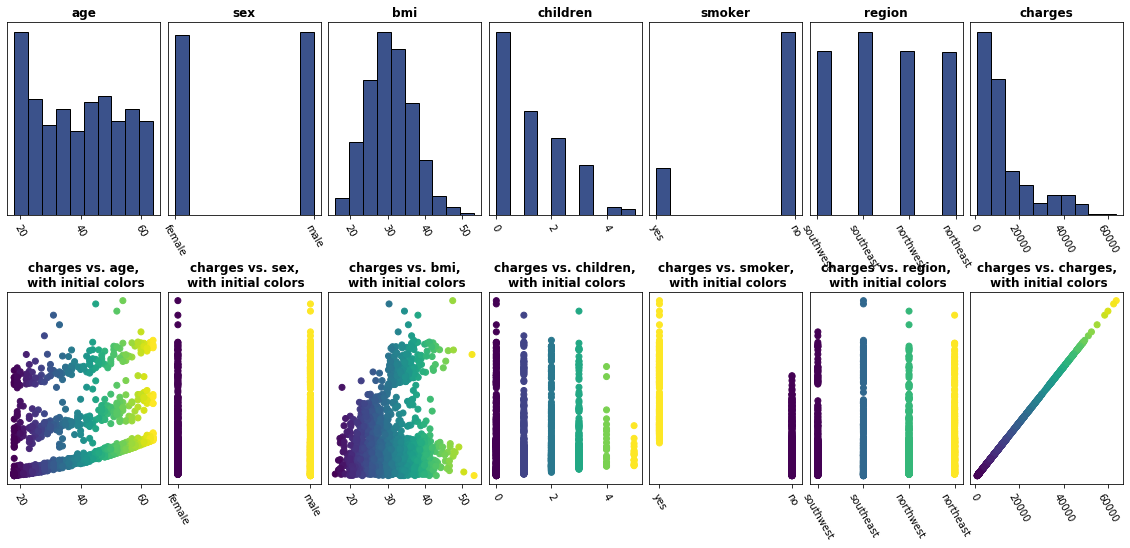

In [5]:
# Initital exploration
plt.figure(figsize=(20,8.5))


for i in range(n_cols):
    # Histogram
    plt.subplot(2, n_cols, i+1)
    plt.hist(data.iloc[:, i], color='#3b528b', edgecolor='black')
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title(columns[i], fontweight="bold")
    
    # Scatter, plotted against 'charges'
    plt.subplot(2, n_cols, i+8)
    plt.scatter(data.iloc[:, i], charges, c = colors_list_all[i], cmap = favorite_cmap)

    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title("charges vs. "+ columns[i]+",\n with initial colors", fontweight="bold")

plt.subplots_adjust(wspace=0.05, hspace=0.4)
plt.show()


#### Color Methodology:

For the bottom row, the colors simply establish that for our numerical columns (age, bmi, children, charges) the colormap assigns a color gradient to the data with purple for low values and yellow for high values. Similarly, we assign purple and yellow to our binary columns (sex, smoker) and these together with intermittent colors for our quaternary column (region). Each color spectrum is independent to its data column: `yellow` only means `male` in figures that are colored by sex; `yellow` means `5 children` in figures that are colored by children. Figure titles explain which data column the colors signify.


#### Discussion:
**Top row:** <br>
There is an even distribution of male vs. female patients, a normal distribution of BMIs, and a relatively even distribution of regions represented, with the southeast appearing slightly more often than the southwest, northeast, or northwest. The age distribution contains a large number of young patients, but an even distribution of ages after roughly age 25 at a count of roughly half the count of those younger than 25. The data is dominated by patients with no or few children and non-smokers, who represent ~5 times the number of smokers. Patient charges reveal a large number of charges less than \\$10,000, and a much lower number of charges above this. There is a stark dip in charge values above \\$10,000 and the continue to trail off as charges approach \\$60,000.

**Bottom row:** <br>
Males and females, patients across varying regions, and patients with varying number of children have relatively even insurance charge distributions. In the case of number of children, patients with 4-5 children have lower insurance charges than people with 3 children or fewer. In the graph of charges vs. age, there are 3 distinct groups of people, all with consistent slopes that correlate age with higher insurance charges. I am enthusiastic to explore the cause of these distinctions and the upward sloping behavior below. No smoker has a charge of less than \\$10,000, and no non-smoker has a charge of more than \\$40,000. BMI also reveal 3 different groups of people, but only one group feels distinct. The groups with the lowest insurance charges and with moderate insurance charges blend significantly. Further analysis may reveal meaningful distinctions between them.

### Section 4: Analysis by Age <a id='age'></a>

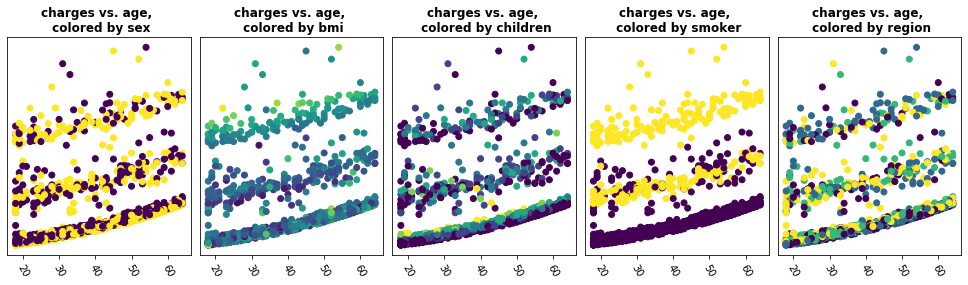

In [6]:
# Analysis of charges vs. age, colored by a third variable

plt.figure(figsize=(24,4))
plot_names_age = ['sex', 'bmi', 'children', 'smoker', 'region']

for i in range(len(colors_list_age)):
    # Scatter plots
    plt.subplot(1, n_cols, i+1)
    plt.scatter(age, charges, c = colors_list_age[i], cmap = favorite_cmap)
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title("charges vs. age, \n colored by "+plot_names_age[i], fontweight="bold")

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()



#### Discussion:

The three distinct groups are most clearly distinguished by a patient's smoker status. The group with the lowest medical insurance charges consists exclusively of non-smokers, whereas the group with the highest charges contains exclusively smokers. However, both smokers and non-smokers find themselves in the group with moderately high insurance charges. I am curious about what factors lead to this behavior. There seems to be an even distribution of patients among the remaining visualizations, with colors based on sex, bmi, children, and region.

### Section 5: Analysis by BMI <a id='bmi'></a>

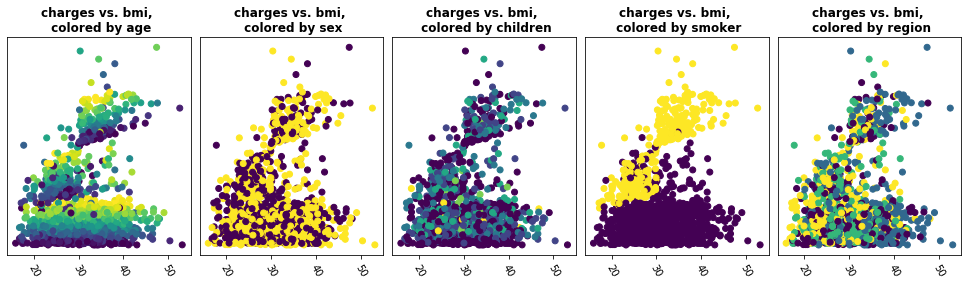

In [7]:
# Analysis of charges vs. bmi, colored by a third variable

plt.figure(figsize=(24,4))
plot_names_bmi = ['age', 'sex', 'children', 'smoker', 'region']

for i in range(len(colors_list_bmi)):
    # Scatter plots
    plt.subplot(1, n_cols, i+1)
    plt.scatter(bmi, charges, c = colors_list_bmi[i], cmap = favorite_cmap)
    
    plt.tick_params(left = False, labelleft = False)
    plt.xticks(rotation = -60)
    plt.title("charges vs. bmi, \n colored by "+plot_names_bmi[i], fontweight="bold")

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.show()

#### Discussion:

The three groups discussed in [Initial Exploration](#initial) are made explicit in the first figure with coloration according to age. Each group, identified by low, moderate, and high insurance charges respectively, reveals a consistent gradient of ages that associates higher insurance charges with older ages. There is curious behavior in the graph of charges vs. bmi with coloration according to a patient's smoker status. If a patient is a smoker with a BMI below 30, they consistently receive moderate insurance charges; however, if a patient is a smoker with a BMI above 30, they consistently receive high insurance charges. The distinction here is very stark. There seems to be clear "floors" in the calculation of insurance charges that disallow patients of certain profiles to receive less than certain insurance charges. Given our previous use of formulas to calculate a patients' insurance charges, I am led to believe that this dataset was synthesized using at least some sort of predetermined formula.

### Section 6: Next Steps <a id=next></a>

At this point, I feel happy with and grateful for this exercise. I'd like to pause here to continue on with my studies on Codecademy. However, if I were to dedicate more time to this project, I would like to experiment with the formula parameters that most closely fit this dataset. For example, we were previously given the following formula for caluclating a patient's insurance cost:

$$
insurance\_cost = 250*age - 128*sex + 370*bmi + 425*num\_of\_children + 24000*smoker - 12500
$$

I briely endeavored to compare the insurance charges calculated by this formula with the insurance charges in the dataset. However, I found the intitial results more disparate than I had expected. I decided to pause this project to return to Codecademy, with the hope of learning more about data modelling.

### Section 7: Resting Place: Where Code Goes to Rest! <a id=rest></a>

In [8]:
# color1, color2, color3, color_else = '#440154', '#31688e', '#35b779', '#fde725'